In [248]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sb

In [249]:
df = pd.read_csv("housing.csv")

In [250]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [251]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<AxesSubplot:ylabel='Frequency'>

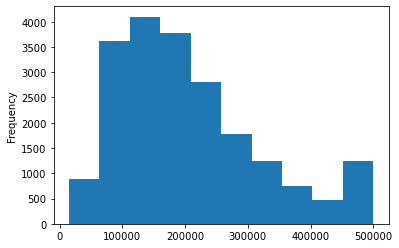

In [252]:
# Look at the median_house_value variable. Does it have a long tail?
df['median_house_value'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

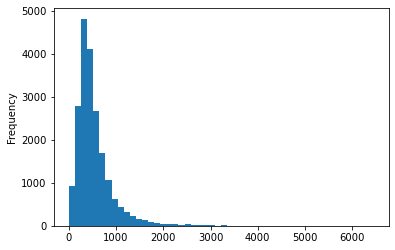

In [253]:
df['total_bedrooms'].plot.hist(bins=50)

In [254]:
df['median_house_value'].value_counts()
# A: it appears as if values >500k are all grouped into value 500001, 
# making it the mode / most frequent unique value in the column 
# --> long tail contained here

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
359200.0      1
54900.0       1
377600.0      1
81200.0       1
47000.0       1
Name: median_house_value, Length: 3842, dtype: int64

In [255]:
df.shape

(20640, 10)

In [256]:
# For the rest of the homework, you'll need to use only these columns:
# 'latitude',
# 'longitude',
# 'housing_median_age',
# 'total_rooms',
# 'total_bedrooms',
# 'population',
# 'households',
# 'median_income',
# 'median_house_value'
# Select only them.

df = df[['latitude',
         'longitude',
         'housing_median_age',
         'total_rooms',
         'total_bedrooms',
         'population',
         'households',
         'median_income',
         'median_house_value']]
df.shape

(20640, 9)

In [257]:
# Question 1
# Find a feature with missing values. How many missing values does it have?
# --> 207 <--
# 208
# 307
# 308
df.isna().sum()[df.isna().sum()>0]
# A: total_bedrooms has 207 missing values

total_bedrooms    207
dtype: int64

In [258]:
# Question 2

# What's the median (50% percentile) for variable 'population'?
# 1133
# 1122
# --> 1166 <--
# 1188
df['population'].median()
# A: median of column 'population' is 1166

1166.0

In [259]:
# Split the data
# Shuffle the initial dataset, use seed 42.
df_shuffled = df.sample(frac = 1, # sample all data
                        random_state = 42, # set seed
                        ignore_index = True) # reset index (--> 0, ..., n-1 instead of original index)
df_shuffled.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
1,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
2,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
3,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
4,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [260]:
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
# Make sure that the target value ('median_house_value') is not in your dataframe.
x_shuffled = df_shuffled.drop('median_house_value', axis = 1)
x_train, x_valid, x_test = np.split(x_shuffled, [int(.6*len(df)), int(.8*len(df))])


In [261]:
print(x_train.shape, x_valid.shape, x_test.shape)

(12384, 8) (4128, 8) (4128, 8)


In [262]:
# Apply the log transformation to the median_house_value variable using the np.log1p() function.
y_shuffled = df_shuffled['median_house_value']
logy_shuffled = np.log1p(y_shuffled).copy()
logy_train, logy_validate, logy_test = np.split(logy_shuffled, [int(.6*len(df)), int(.8*len(df))])

In [263]:
# Question 3

# We need to deal with missing values for the column from Q1.
# We have two options: fill it with 0 or with the mean of this variable.
x_train_fillzero = x_train.copy()
x_train_fillzero['total_bedrooms'] = x_train['total_bedrooms'].fillna(0, inplace=False)

x_train_fillmean = x_train.copy()
x_train_fillmean['total_bedrooms'] = x_train['total_bedrooms'].fillna(x_train['total_bedrooms'].mean(),
                                                                     inplace=False)

x_train_fillmedian = x_train.copy()
x_train_fillmedian['total_bedrooms'] = x_train['total_bedrooms'].fillna(x_train['total_bedrooms'].median(),
                                                                     inplace=False)

In [264]:
print('mean of total_bedrooms in x_train:', 
      x_train['total_bedrooms'].mean())
print('mean of total_bedrooms in x_train_fillzero:',
      x_train_fillzero['total_bedrooms'].mean())
print('mean of total_bedrooms in x_train_fillmean:',
      x_train_fillmean['total_bedrooms'].mean())

mean of total_bedrooms in x_train: 533.4803317730147
mean of total_bedrooms in x_train_fillzero: 524.5631459948321
mean of total_bedrooms in x_train_fillmean: 533.4803317730147


In [265]:
print('Value counts of total_bedrooms in x_train: \n',
      x_train['total_bedrooms'].value_counts(dropna=False))
print('Value counts of total_bedrooms in x_train_fillzero: \n',
      x_train_fillzero['total_bedrooms'].value_counts(dropna=False))
print('Value counts of total_bedrooms in x_train_fillmean: \n',
      x_train_fillmean['total_bedrooms'].value_counts(dropna=False))

Value counts of total_bedrooms in x_train: 
 NaN       207
328.0      38
343.0      36
345.0      34
280.0      33
         ... 
1997.0      1
1444.0      1
2139.0      1
3493.0      1
1415.0      1
Name: total_bedrooms, Length: 1682, dtype: int64
Value counts of total_bedrooms in x_train_fillzero: 
 0.0       207
328.0      38
343.0      36
345.0      34
280.0      33
         ... 
1997.0      1
1444.0      1
2139.0      1
3493.0      1
1415.0      1
Name: total_bedrooms, Length: 1682, dtype: int64
Value counts of total_bedrooms in x_train_fillmean: 
 533.480332     207
328.000000      38
343.000000      36
345.000000      34
280.000000      33
              ... 
1997.000000      1
1444.000000      1
2139.000000      1
3493.000000      1
1415.000000      1
Name: total_bedrooms, Length: 1682, dtype: int64


In [266]:
# Try both options. For each, train a linear regression model without 
# regularization using the code from the lessons.
# For computing the mean, use the training only!
# Use the validation dataset to evaluate the models and compare the RMSE of each option.

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

base = x_train.columns.values.copy()

In [267]:
# fillna: zero
w_0_fillzero, w_fillzero = train_linear_regression(x_train_fillzero, logy_train)

# prepare x_valid using same logic as for x_train (replace total_bedroom NAs with 0)
x_valid_fillzero = x_valid.copy()
x_valid_fillzero['total_bedrooms'] = x_valid['total_bedrooms'].fillna(0, 
                                                                      inplace=False)

# calculate predictions for x_valid
logy_valid_pred_fillzero = w_0_fillzero + x_valid_fillzero.dot(w_fillzero)

In [268]:
# fillna: mean
w_0_fillmean, w_fillmean = train_linear_regression(x_train_fillmean, logy_train)

# prepare x_valid using same logic as for x_train (replace total_bedroom NAs with mean in x_valid)
x_valid_fillmean = x_valid.copy()
x_valid_fillmean['total_bedrooms'] = x_valid['total_bedrooms'].fillna(x_valid['total_bedrooms'].mean(),
                                                                      inplace=False)

# calculate predictions for x_valid
logy_valid_pred_fillmean = w_0_fillmean + x_valid_fillmean.dot(w_fillmean)

In [269]:
# fillna: median
w_0_fillmedian, w_fillmedian = train_linear_regression(x_train_fillmedian, logy_train)

# prepare x_valid using same logic as for x_train (replace total_bedroom NAs with median in x_valid)
x_valid_fillmedian = x_valid.copy()
x_valid_fillmedian['total_bedrooms'] = x_valid['total_bedrooms'].fillna(x_valid['total_bedrooms'].median(),
                                                                     inplace=False)

# calculate predictions for x_valid
logy_valid_pred_fillmedian = w_0_fillmedian + x_valid_fillmedian.dot(w_fillmedian)

In [270]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

print('RMSE of true logy_valid vs prediction based on x_valid_fillzero: \n',
     round(rmse(logy_validate, logy_valid_pred_fillzero), 2))
print('RMSE of true logy_valid vs prediction based on x_valid_fillmean: \n',
     round(rmse(logy_validate, logy_valid_pred_fillmean), 2))
print('RMSE of true logy_valid vs prediction based on x_valid_fillmedian: \n',
     round(rmse(logy_validate, logy_valid_pred_fillmedian), 2))

RMSE of true logy_valid vs prediction based on x_valid_fillzero: 
 0.33
RMSE of true logy_valid vs prediction based on x_valid_fillmean: 
 0.33
RMSE of true logy_valid vs prediction based on x_valid_fillmedian: 
 0.33


In [271]:
# Round the RMSE scores to 2 decimal digits using round(score, 2)
# Which option gives better RMSE?
# With 0
# With mean
# With median
# --> Both are equally good <--
# A: RMSE of 0.33 for all approaches.. hm?

In [272]:
# Question 4

# Now let's train a regularized linear regression.
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

# For this question, fill the NAs with 0.
# Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(x_train_fillzero, 
                                         logy_train, 
                                         r = r)
    logy_pred_fillzero = w_0 + x_valid_fillzero.dot(w)
    print('%6s' %r, round(rmse(logy_validate, logy_pred_fillzero),2))

# Use RMSE to evaluate the model on the validation dataset.
# Round the RMSE scores to 2 decimal digits.

# Which r gives the best RMSE? If there are multiple options, select the smallest r.
# --> 0 <--
# 0.000001
# 0.001
# 0.01

     0 0.33
 1e-06 0.33
0.0001 0.33
 0.001 0.33
  0.01 0.33
   0.1 0.33
     1 0.33
     5 0.34
    10 0.34


In [286]:
# Question 5

# We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
# Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

list_rmse = list()
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_shuffled = df.sample(frac = 1, # sample all data
                        random_state = seed, # set seed
                        ignore_index = True) # reset index (--> 0, ..., n-1 instead of original index)
    
    # For each seed, do the train/validation/test split with 60%/20%/20% distribution.
    x_shuffled = df_shuffled.drop('median_house_value', axis = 1)
    x_train, x_valid, x_test = np.split(x_shuffled, [int(.6*len(df)), int(.8*len(df))])
    
    y_shuffled = df_shuffled['median_house_value']
    logy_shuffled = np.log1p(y_shuffled).copy()
    logy_train, logy_validate, logy_test = np.split(logy_shuffled, [int(.6*len(df)), int(.8*len(df))])
    
    # Fill the missing values with 0 
    x_train_fillzero = x_train.copy()
    x_train_fillzero['total_bedrooms'] = x_train['total_bedrooms'].fillna(0, inplace=False)
    
    # and train a model without regularization.
    w_0_fillzero, w_fillzero = train_linear_regression(x_train_fillzero, logy_train)

    logy_pred_fillzero = w_0 + x_valid_fillzero.dot(w)
    
    # For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
    print('%6s' %seed, round(rmse(logy_validate, logy_pred_fillzero),2))
    
    list_rmse.append(rmse(logy_validate, logy_pred_fillzero))

print(list_rmse)

std = np.std(list_rmse)
print('Standard deviation of the RMSE list: ', round(std, 4))

# What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
# Round the result to 3 decimal digits (round(std, 3))
# Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.
# 0.5
# 0.05
# --> 0.005 <-- 
# 0.0005

# 0.0059 --> closest to 0.005

     0 0.72
     1 0.72
     2 0.71
     3 0.71
     4 0.72
     5 0.73
     6 0.71
     7 0.71
     8 0.71
     9 0.72
[0.7170567406013912, 0.7237685432771442, 0.7100439422338615, 0.7143885336605411, 0.7228819156007061, 0.7285264205670212, 0.7107493476390669, 0.7147065411486576, 0.711147799341097, 0.7176724065692189]
Standard deviation of the RMSE list:  0.0059


In [292]:
# Question 6

# Split the dataset like previously, use seed 9.
df_shuffled = df.sample(frac = 1, # sample all data
                        random_state = 9, # set seed
                        ignore_index = True) # reset index (--> 0, ..., n-1 instead of original index)

# Combine train and validation datasets.
x_shuffled = df_shuffled.drop('median_house_value', axis = 1)
x_train, x_valid, x_test = np.split(x_shuffled, [int(.6*len(df)), int(.8*len(df))])
x_trainvalid = pd.concat([x_train, x_valid])

y_shuffled = df_shuffled['median_house_value']
logy_shuffled = np.log1p(y_shuffled).copy()
logy_train, logy_valid, logy_test = np.split(logy_shuffled, [int(.6*len(df)), int(.8*len(df))])
logy_trainvalid = pd.concat([logy_train, logy_valid])

# Fill the missing values with 0 
x_trainvalid_fillzero = x_trainvalid.copy()
x_trainvalid_fillzero['total_bedrooms'] = x_trainvalid['total_bedrooms'].fillna(0, inplace=False)

# and train a model with r=0.001.
w_0, w = train_linear_regression_reg(x_trainvalid_fillzero, 
                                     logy_trainvalid,
                                     r = 0.001)

logy_pred_fillzero = w_0 + x_trainvalid_fillzero.dot(w)

rmse(logy_validate, logy_pred_fillzero)

# What's the RMSE on the test dataset?
# --> 0.35 <--
# 0.035
# 0.45
# 0.045

# 0.336 --> closest to 0.35

0.33583911267438604